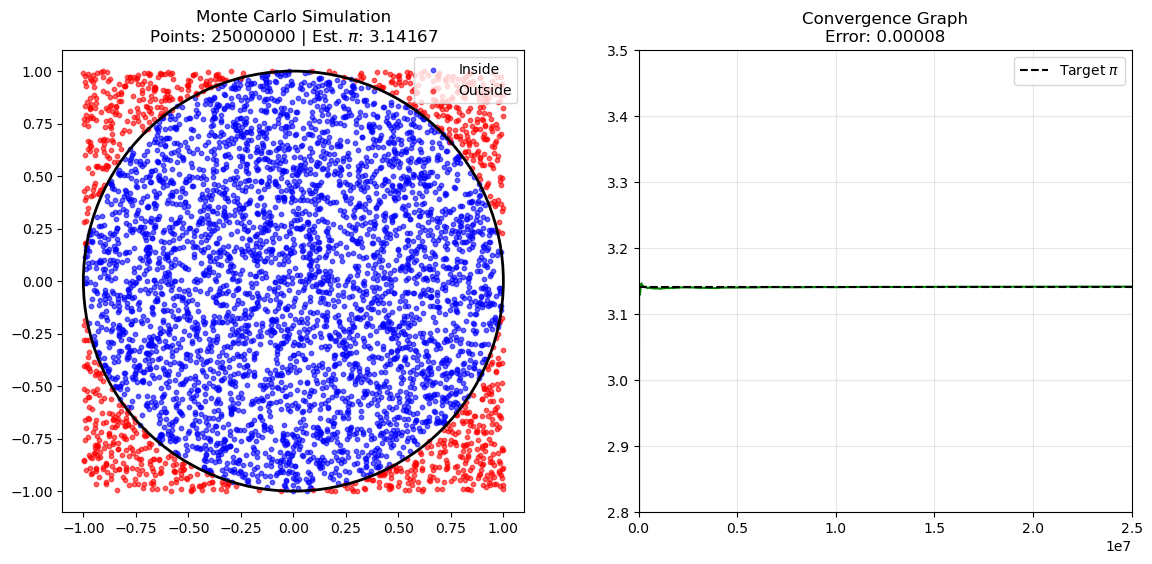

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def visualize_monte_carlo(total_points=20000, refresh_rate=1000):
    x_all = np.random.uniform(-1, 1, total_points)
    y_all = np.random.uniform(-1, 1, total_points)

    dist_sq = x_all**2 + y_all**2
    inside_mask_all = dist_sq <= 1

    cumulative_inside = np.cumsum(inside_mask_all)
    cumulative_total = np.arange(1, total_points + 1)
    pi_history = 4 * (cumulative_inside / cumulative_total)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    scat_in = ax1.scatter([], [], color='blue', s=10, alpha=0.6, label='Inside')
    scat_out = ax1.scatter([], [], color='red', s=10, alpha=0.6, label='Outside')

    circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2)
    ax1.add_patch(circle)
    ax1.set_xlim(-1.1, 1.1)
    ax1.set_ylim(-1.1, 1.1)
    ax1.set_aspect('equal')
    ax1.legend(loc='upper right')
    title_left = ax1.set_title("Initializing...")

    line, = ax2.plot([], [], color='green', linewidth=1.5)
    ax2.axhline(y=np.pi, color='black', linestyle='--', label='Target $\pi$')
    ax2.set_xlim(0, total_points)
    ax2.set_ylim(2.8, 3.5)
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper right')
    title_right = ax2.set_title("Waiting...")


    steps = list(range(refresh_rate, total_points + 1, refresh_rate))

    for i in steps:
        window_size = 5000
        start_idx = max(0, i - window_size)
        curr_mask = inside_mask_all[start_idx:i]
        curr_x = x_all[start_idx:i]
        curr_y = y_all[start_idx:i]

        if len(curr_x) > 0:
            data_in = np.column_stack((curr_x[curr_mask], curr_y[curr_mask]))
            data_out = np.column_stack((curr_x[~curr_mask], curr_y[~curr_mask]))

            scat_in.set_offsets(data_in)
            scat_out.set_offsets(data_out)

        step_plot = max(1, i // 1000)
        line.set_data(cumulative_total[:i:step_plot], pi_history[:i:step_plot])

        curr_pi = pi_history[i-1]
        err = abs(np.pi - curr_pi)
        title_left.set_text(f"Monte Carlo Simulation\nPoints: {i} | Est. $\pi$: {curr_pi:.5f}")
        title_right.set_text(f"Convergence Graph\nError: {err:.5f}")

        display(fig, clear=True)

    plt.close()
N = int(input("Masukan jumlah titik yang ingin disimulasikan: "))
RR = int(input("Masukan refresh rate: "))
visualize_monte_carlo(total_points=N, refresh_rate=RR)